In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
len(X_train)

60000

In [30]:
len(X_test)

10000

In [31]:
X_train[0].shape

(28, 28)

In [32]:
X_train = X_train / 255
X_test = X_test / 255

In [33]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

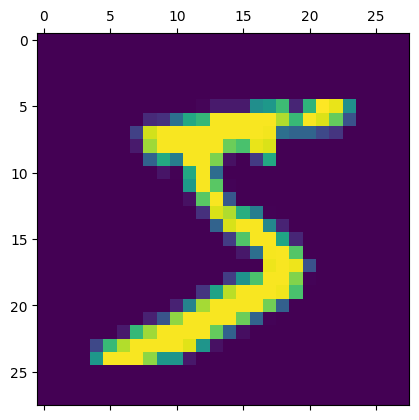

In [34]:
plt.matshow(X_train[0])

In [35]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape


(60000, 784)

In [38]:
X_test.shape

(10000, 28, 28)

In [39]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [40]:
from keras.layers import Input, Dense

model = keras.Sequential([
    Dense(10, input_dim=784, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4628 - accuracy: 0.8798
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9249


In [41]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9265


[0.26458147168159485, 0.9265000224113464]

In [44]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.6539877e-02, 3.9356837e-07, 5.4313887e-02, 9.5229232e-01,
       2.9954554e-03, 1.2476944e-01, 1.1507159e-06, 9.9986386e-01,
       9.6311018e-02, 7.1821338e-01], dtype=float32)

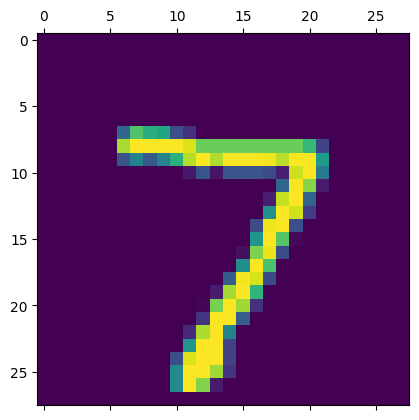

In [45]:
plt.matshow(X_test[0])

In [47]:
np.argmax(y_predicted[0])

7

In [48]:
y_predicted_lables = [np.argmax(i) for i in y_predicted]
y_predicted_lables[:5]

[7, 2, 1, 0, 4]

In [50]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [51]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    3,    4,    0,    6,    9,    2,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   4,    9,  923,   20,    7,    4,   13,   10,   39,    3],
       [   1,    0,   17,  932,    0,   16,    3,   12,   21,    8],
       [   1,    1,    4,    1,  915,    0,   10,    4,   10,   36],
       [   6,    2,    2,   43,   10,  767,   17,    5,   33,    7],
       [   9,    3,    5,    1,    7,   14,  914,    2,    3,    0],
       [   1,    5,   21,    5,    7,    0,    0,  956,    4,   29],
       [   3,    7,    6,   23,    9,   20,   10,   13,  877,    6],
       [   7,    7,    2,   10,   23,    6,    0,   30,    5,  919]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

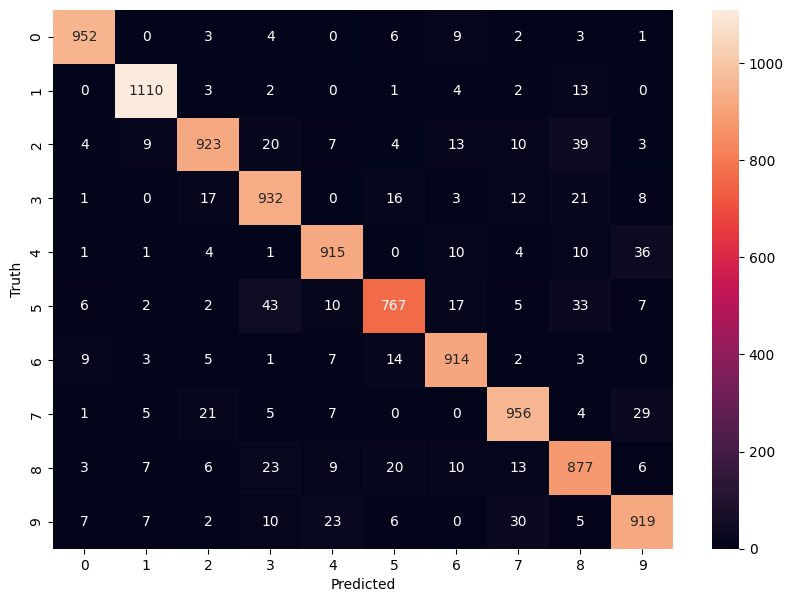

In [52]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
model = keras.Sequential([
    keras.layers.Dense(100, input_dim=784, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2723 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1224 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0863 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0651 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9845


In [54]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0734 - accuracy: 0.9782


[0.07342378795146942, 0.9782000184059143]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

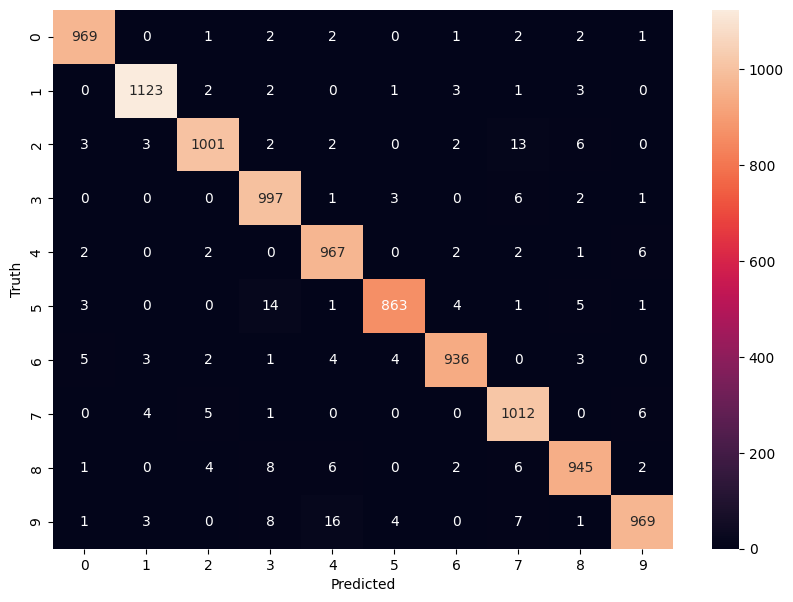

In [56]:
y_predicted = model.predict(X_test_flattened)
y_predicted_lables = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lables)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')